In [14]:
# this set of code gets 9 Vanguard Funds closing prices from 1-1-2-15 to 12-31-2019, which is the
# timeframe that the real estate data covers. (This treatment ignores dividends.)
# the code creates a function that will get data from alpaca for a given set of stocks over a certain time period.
# the first time the function is run it gets data that covers the same time frame that the real estate data covers.

# INSERT FOLLOWING TEXT INTO README

# In order to compare the perfomace of the Real Estate markets analyzed we looked at nine of the core Vanguard Mutual Funds.
# We looked at those because they represent investments that are often made by a typical investor, and because they represent
# several different ways of capturing the performance of large parts of the market. The first one, Vangaurd Total Stock Market ETF
# (VTI) attempts to capture the performance of the entire stock market by using the CRSP Total Market Index. The Vanguard Total Inernational
# Stock Index (VXUS) uses an index that tracks the performance of all stock markets outside the US. Vanguard's Total Bond Market ETF 
# (BND) is intended to track the performance of the entire US Bond market and is identified as a stable long term investment that's a
# good way to diversify equity investments. Vanguard Total International Bond ETF (BNDX) attempts to mirror the performance of an index 
# that represents the non-US investment grade bond market hedged in US Dollars. The next set of funds looks at a smaller part of the US Market. Vanguard Growth ETF (VUG) replecates the performance of 
# the CRSP Large Cap Growth Index, the Vanguard Small-Cap ETF (VB) mirrors the performance of a CRSP index of stocks with a small market cap, Vanguard S&P 500 ETF (VOO)
# track the S&P 500, and the Vanguard Russell 1000 Growth ETF (VONG) mirros an Russel index that tracks stock with good potential for long term growth and 
# is volitaile but is said to have excellent long term growth potential.  All of the funds mentioned here are passively managed. The descriptions of the objectives of the funds
# are taken from Vanguard's website, and CRSP is the Center for Research in Stock Prices. 

# This line is needed to make the code work with my faulty Jupyter Notebooks, which don't always have programs installed
# in the base environment.

! pip install alpaca-trade-api

# Import the necessary libraries. 

import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import alpaca_trade_api as tradeapi
%matplotlib inline

In [15]:
# import the .env reader

from dotenv import load_dotenv
load_dotenv()

# Create a function that pulls stock closing prices from Alpaca. The three inputs are the tickers you're interested in, the start date,
# and the end date.

def alpaca_data_puller(ticker_input, start_date_input, end_date_input):
    
    # Set Alpaca API key and secret
    alpaca_api_key = os.getenv("APCA_API_KEY")
    alpaca_secret_key = os.getenv("APCA_SECRET_KEY")

    # Create the Alpaca API object
    api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2")

    ticker = ticker_input

    timeframe = "1D"

    start_date = pd.Timestamp(start_date_input, tz='America/New_York').isoformat()
    end_date = pd.Timestamp(end_date_input, tz='America/New_York').isoformat()

    new_df = api.get_barset(
         ticker,
         timeframe,
         limit=None,
         start=start_date,
         end=end_date,
         after=None,
         until=None,
     ).df

    # Drop unnecessary columns
    new_df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)

    # Drop Nulls

    new_df.dropna(inplace=True)
    
    return new_df

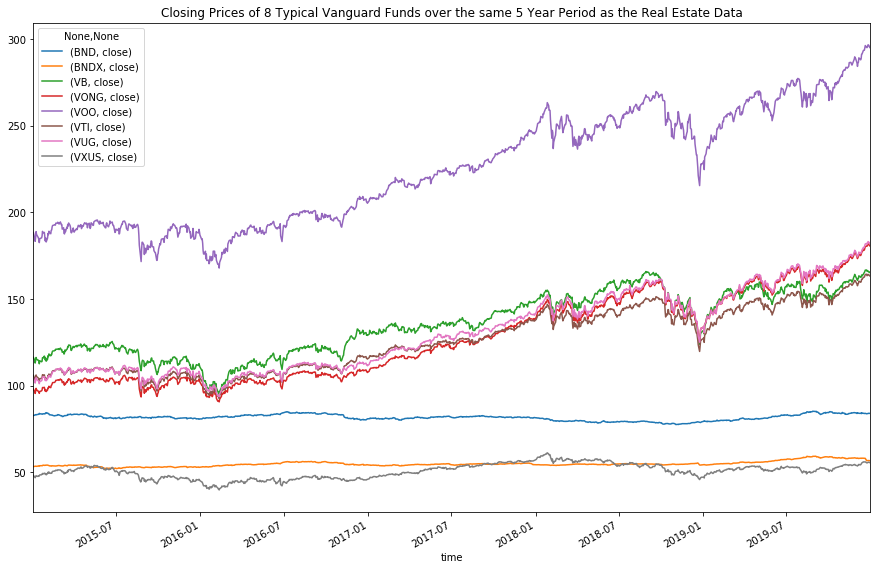

In [16]:
# run the alpaca_data_puller function to pull the data for the 8 Vanguard funds for the time frame that the real estate
# data covers

eight_vanguard_funds = ["VTI", "VXUS", "BND", "BNDX", "VUG", "VB", "VOO", "VONG"]

vanguard_comparison_df = alpaca_data_puller(eight_vanguard_funds, '2015-01-01', '2019-12-31')

# vanguard_comparison_df.head()

# Graph the Closing Prices - CREATE A KEY FOR THE GRAPH

plot_title = f"Closing Prices of 8 Typical Vanguard Funds over the same 5 Year Period as the Real Estate Data"

vanguard_comparison_df.plot(legend=("best"), title=plot_title, figsize=(15,10))

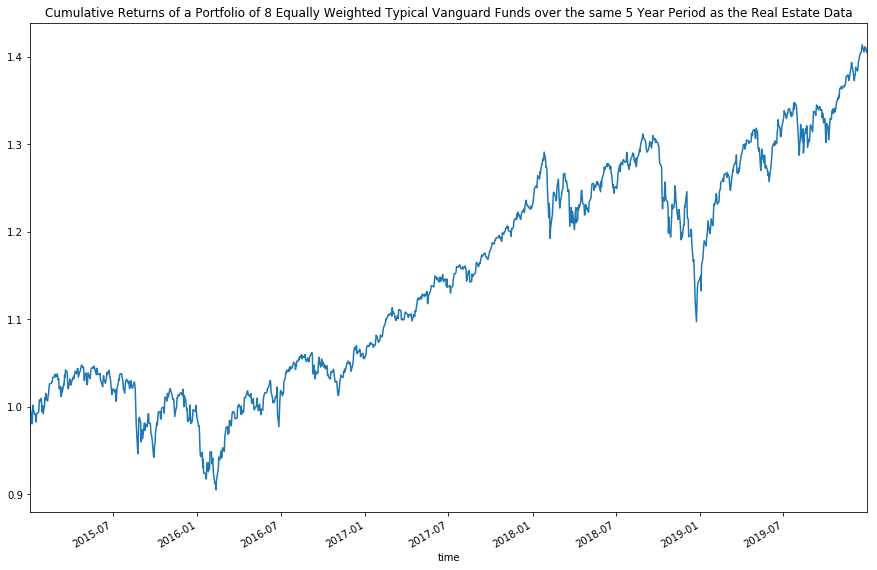

In [17]:
# Graph the performane of an equally weighted portfolio over the 5 year period

vanguard_comparison_daily_returns = vanguard_comparison_df.pct_change()

equal_weights = [.125, .125, .125, .125, .125, .125, .125, .125]

portfolio_daily_returns = vanguard_comparison_daily_returns.dot(equal_weights)

vanguard_portfolio_cumulative_returns = (1 + portfolio_daily_returns.fillna(0)).cumprod()

plot_title = f"Cumulative Returns of a Portfolio of 8 Equally Weighted Typical Vanguard Funds over the same 5 Year Period as the Real Estate Data"

vanguard_portfolio_cumulative_returns.plot(legend=(), title=plot_title, figsize=(15,10))

This section allows the user to create their own custom portfolio stocks and compare them to the Vanguard funds. This section will take as many inputs as the user wants, but the monte carlo anlysis will only display the first two stocks. How many would you like to display? 8
Enter a valid stock ticker. If an invalid stock ticker is entered the progam will drop the data and nothing will be displayed for that ticker. AAPL
What percentage of the portfolio would you like that stock to comprise? .2
Enter a valid stock ticker. If an invalid stock ticker is entered the progam will drop the data and nothing will be displayed for that ticker. AMZN
What percentage of the portfolio would you like that stock to comprise? .2
Enter a valid stock ticker. If an invalid stock ticker is entered the progam will drop the data and nothing will be displayed for that ticker. TSLA
What percentage of the portfolio would you like that stock to comprise? .15
Enter a valid stock ticker. If an invalid stock ticker

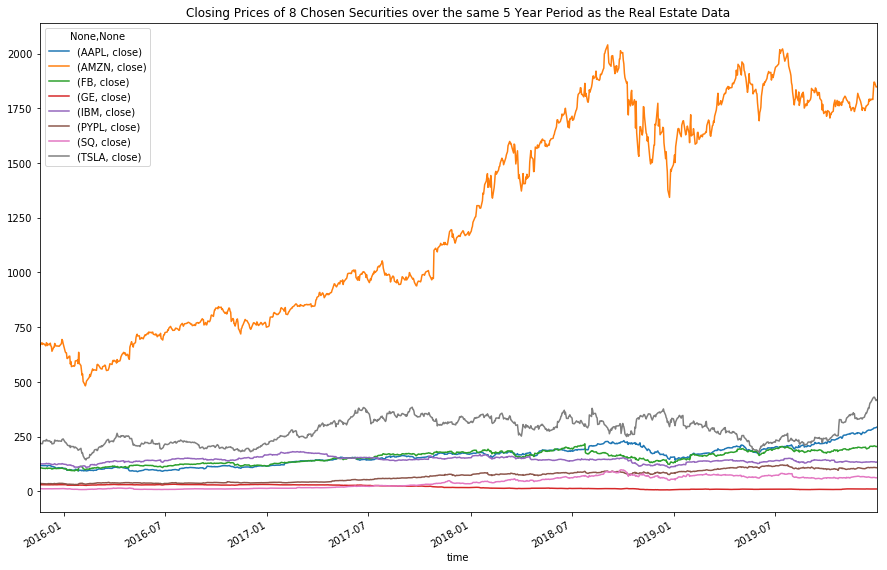

In [19]:
# Create the custom portfolio and custom weights - this allows the user to create a custom portolio of  eight stocks weighted the way they
# want it to be and see it's performance. Compatability with the monte carlo anlysis in the next section is the limiting factor. the input function
# only takes in strings so the code changes the input to a int or float as needed. The code creates two dataframes for
# the selected stocks - one that displays the same time frame as the real estate data, and one that gets newer data to make
# the monte carlo simulation more accurate. Ideally it would take data from a longer time period, but I wanted to ensure
# that my machine would run the code.

number_of_stocks = input("This section allows the user to create their own custom portfolio stocks and compare them to the Vanguard funds. This section will take as many inputs as the user wants, but the monte carlo anlysis will only display the first two stocks. How many would you like to display?")

number_of_stocks = int(number_of_stocks)

custom_ticker = []
custom_weight = []

for i in range(0, number_of_stocks):
    ticker = input('Enter a valid stock ticker. If an invalid stock ticker is entered the progam will drop the data and nothing will be displayed for that ticker.')
    weight = input('What percentage of the portfolio would you like that stock to comprise?')
    custom_ticker.append(ticker)
    weight = float(weight)
    custom_weight.append(weight)

custom_comparison_df = alpaca_data_puller(custom_ticker, '2015-01-01', '2019-12-31')
custom_mc_df = alpaca_data_puller(custom_ticker, pd.Timestamp.today() - pd.Timedelta('1260 days'), pd.Timestamp.today())

# dropping the nulls will prevent an error if an invalid stock ticker is entered, at least for this portion. if the user only
# chooses two stocks a faulty ticker will produce an error when the monte carlo simulation is run.

custom_comparision_df = custom_comparison_df.dropna()

plot_title = f"Closing Prices of {number_of_stocks} Chosen Securities over the same 5 Year Period as the Real Estate Data"

custom_comparison_df.plot(legend=('best'), title=plot_title, figsize=(15,10))

# INSERT TEXT INTO NOTEBOOK

# This section allows the user to choose their own portfolio of stocks and shows the closing prices over the same period
# as the real estate data, as well as the performance of a portfolio weighted the way the user wanted it to be. Only
# the first two stocks will go on to the monte carlo simulation.


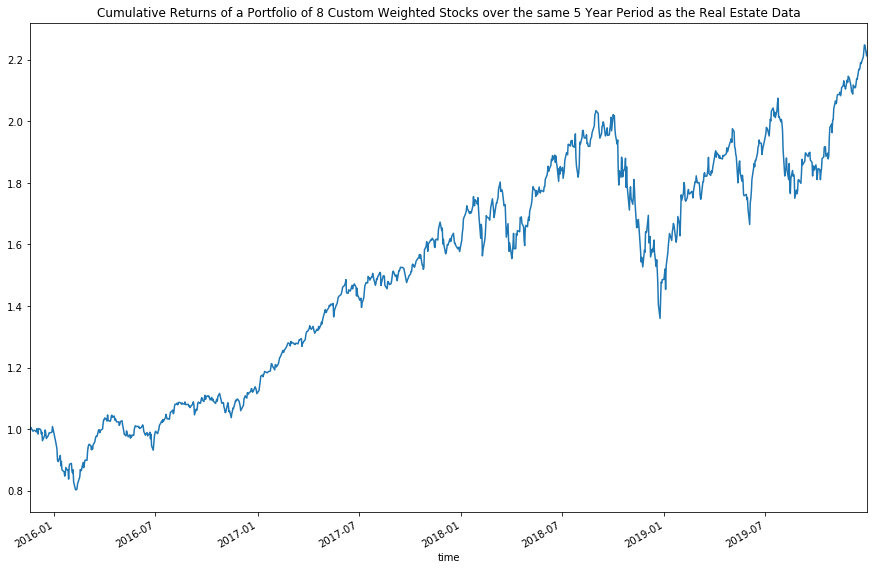

In [20]:



# This calculates the performance of the entire portfolio.

custom_daily_returns = custom_comparison_df.pct_change()

custom_portfolio_daily_returns = custom_daily_returns.dot(custom_weight)

custom_portfolio_cumulative_returns = (1 + custom_portfolio_daily_returns.fillna(0)).cumprod()

plot_title = f"Cumulative Returns of a Portfolio of {number_of_stocks} Custom Weighted Stocks over the same 5 Year Period as the Real Estate Data"

custom_portfolio_cumulative_returns.plot(legend=(), title = plot_title, figsize=(15,10))

In [21]:
# the comparision_df stops at the end of 2019 because the real estate data does, this set of code creates a new df
# called monte_carlo_df that takes the last five years of data that's available to make the monte carlo model more accurate.

vanguard_mc_df = alpaca_data_puller(eight_vanguard_funds, pd.Timestamp.today() - pd.Timedelta('1260 days'), pd.Timestamp.today())

#vanguard_mc_df.tail() 

# this data is not graphed because it's used to predict the future in the next section, and it covers a different time period
# than the real estate data.

In [25]:
# now that we have a data frame with the last five years closing prices this set of code predicts prices for the 
# next thirty years.

# this creates a function that runs Monte Carlo Analysis whose input is a data frame of historic stock prices, a list of two stock tickers,
# and the weights. this originally allowed for eight stocks to be analyzed at once, but that wouldn't run on my machine so it only
# does two at a time. the ticker is set to read the first two entries only, so the user can display as many stocks as they want to
# above without creating an error. The code removes accounts for the fact that the weights will be less than one if the user selected 
# more stocks and creates a new weighting that is proportional to the original one. 

def monte_carlo_function(df, ticker, weights):

    daily_returns = df.pct_change()
    
    zero_name = ticker[0]
    one_name = ticker[1]
    
    del weights[2:]
    
    if sum(weights) < 1:
        weights = [i * (1/sum(weights)) for i in weights]
    

# Calculate average daily returns. 

    avg_daily_return_zero = daily_returns.mean()[zero_name]['close']
    avg_daily_return_one = daily_returns.mean()[one_name]['close']
    

# Compute daily volatility. the #'d out code prints the results.

    std_dev_return_zero = daily_returns.std()[zero_name]['close']
    std_dev_return_one = daily_returns.std()[one_name]['close']
   
    zero_last_price = df[zero_name]['close'][-1]
    one_last_price = df[one_name]['close'][-1]
    

# Setup the Monte Carlo Parameters
    number_simulations = 5
    number_records = 252 * 30
    monte_carlo = pd.DataFrame()

# Run the Monte Carlo Simulation

# Initialize empty DataFrame to hold simulated prices for each simulation, and declare empty lists for the individual stock prices.
    simulated_price_df = pd.DataFrame()
    simulated_zero_prices = []

# Run the simulation of projecting stock prices for the next trading year, `500` times
    for n in range(number_simulations):

# Initialize the simulated prices list with the last closing price of each mutual fund.
        simulated_zero_prices = [zero_last_price]
        simulated_one_prices = [one_last_price]
       
    
# Simulate the returns for 252 days
        for i in range(number_records):
        
        # Calculate the simulated price using the last price within the list
            simulated_zero_price = simulated_zero_prices[-1] * (1 + np.random.normal(avg_daily_return_zero, std_dev_return_zero))
            simulated_one_price = simulated_one_prices[-1] * (1 + np.random.normal(avg_daily_return_one, std_dev_return_one))
            
        
        # Append the simulated price to the list
            simulated_zero_prices.append(simulated_zero_price)
            simulated_one_prices.append(simulated_one_price)
            
    
    # Append the simulated prices of each simulation to DataFrame
            simulated_price_df[zero_name] = pd.Series(simulated_zero_prices)
            simulated_price_df[one_name] = pd.Series(simulated_one_prices)
          
    
    # Calculate the daily returns of simulated prices
        simulated_daily_returns = simulated_price_df.pct_change()
        
        portfolio_daily_returns = simulated_daily_returns.dot(weights)
                                                 
        portfolio_cumulative_returns = (1 + portfolio_daily_returns.fillna(0)).cumprod()  
                                             
        return portfolio_cumulative_returns
                                             

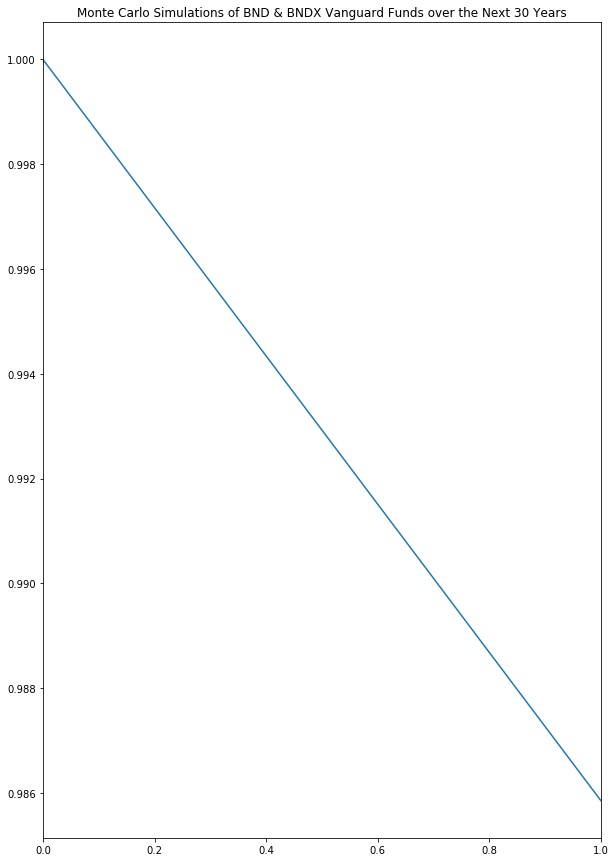

In [26]:
# Calling this function should produce the weighted return of the entire portfolio. I had originally planned to have all eight
# compared at the same time, but my computer wouldn't run it. it still won't, I don't know why. almost all of the code in the 
# functionw as copied from the API homework, where it worked.
                                             
vg_simulated_daily_returns = monte_carlo_function(vanguard_mc_df, eight_vanguard_funds, equal_weights)

# this shows the projected performance of the first two funds.

plot_title = f"Monte Carlo Simulations of BND & BNDX Vanguard Funds over the Next 30 Years"
vg_simulated_daily_returns.plot(legend=None, title=plot_title, figsize=(10,15))

In [27]:

# Select the last row for the cumulative returns (cumulative returns at 30 years). I think this should work but can't trouble
# shoot it because I can't get the monte carlo simulation to work.

last_row_simulated_ending_portfolio_values = vg_simulated_daily_returns.iloc[-1]

print("For the Vangaurd Portfolio the 90% confidence level is printed below.")

print(last_row_simulated_ending_portfolio_values)

confidence_interval = last_row_simulated_ending_portfolio_values.quantile(q=[0.05, 0.95])
print(confidence_interval)

For the Vangaurd Portfolio the 90% confidence level is printed below.
0.9858542055190518


AttributeError: 'numpy.float64' object has no attribute 'quantile'

In [28]:
plot_title = ("Distriution of the Simulated Ending Vanguard Portfolio Values")

last_row_simulated_ending_portfolio_values.plot(kind='hist', bins=20, title=plot_title)

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [ ]:
# If the MC simulation were working I would repeat this for the next 6 funds, creating a new ticker when calling
# the function each time by slicing the eight_vangaurd_funds variable.

In [11]:
# This section attempts to display the Monte Carlo Simulation of the first two custom stocks, and calls the function
# with the data frame that has the newer data in it.

custom_simulated_daily_returns = monte_carlo_function(custom_mc_df, custom_ticker, custom_weights)

plot_title = f"Monte Carlo Simulations of 2 User Selected Stocks over the Next 30 Years"
simulated_daily_returns.plot(legend=None, title=plot_title, figsize=(10,15))

NameError: name 'custom_weights' is not defined

In [12]:

# Select the last row for the cumulative returns (cumulative returns at 30 years)

last_row_simulated_ending_portfolio_values = vg_simulated_daily_returns.iloc[-1]

print("For the Vangaurd Portfolio the 90% confidence level is printed below.")

print(last_row_simulated_ending_portfolio_values)

confidence_interval = last_row_simulated_ending_portfolio_values.quantile(q=[0.05, 0.95])
print(confidence_interval)

For the Vangaurd Portfolio the 90% confidence level is printed below.
1.0019429044742416


AttributeError: 'numpy.float64' object has no attribute 'quantile'

In [13]:
plot_title = ("Distriution of the Custom Ending Vanguard Portfolio Values")

custom_last_row_simulated_ending_portfolio_values.plot(kind='hist', bins=20, title=plot_title)

NameError: name 'custom_last_row_simulated_ending_portfolio_values' is not defined